In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import math

In [2]:
r = 0.1
s0 = 100
sigma = 0.3
strike = 110
t = 1
cur_time = 0

In [4]:
def terminal_shareprice(s0, r, sigma, z, t):
    return s0*np.exp((r-sigma**2/2)*t+sigma*np.sqrt(t)*z)

In [19]:
def discounted_call_payoff(st, k, r, t):
    return np.exp(-r*t)*np.maximum(st-k,0)

In [20]:
np.random.seed(0)

In [21]:
mcall_estimates = [None]*50
mcall_std = [None]*50

In [23]:
for i in range(1,51):
    norm_array = norm.rvs(size = 1000*i)
    term_val = terminal_shareprice(s0, r, sigma, norm_array, t)
    mcall_val = discounted_call_payoff(term_val, strike, r, t)
    mcall_estimates[i-1] = np.mean(mcall_val)
    mcall_std[i-1] = np.std(mcall_val)/np.sqrt(1000*i)

In [34]:
# analytical value of the call price

d1 = (math.log(s0/strike) + (r+sigma**2/2)*t)/(sigma*math.sqrt(t))
d2 = d1 - sigma*math.sqrt(t)
call_pe = s0*norm.cdf(d1) - strike*math.exp(-r*t)*norm.cdf(d2)

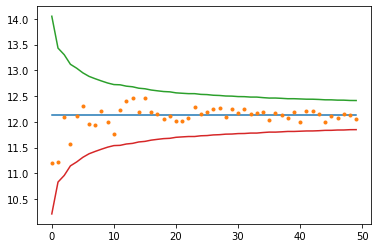

In [35]:
# plotting the graph for the call price simulation
plt.plot([call_pe]*50)
plt.plot(mcall_estimates,'.')
plt.plot(call_pe + np.array(mcall_std)*3)
plt.plot(call_pe - np.array(mcall_std)*3)